# Proyek Analisis Data: Air Quality in Changping District
- **Nama:** Rendi Adinata
- **Email:** rendy.adinata88@gmail.com
- **ID Dicoding:** xinuzo

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apakah terdapat pengaruh signifikan antara temperatur di Changping dengan suatu polutan udara?
- Pertanyaan 2 : Apakah terdapat perubahan signifikan dalam kadar polutan udara yang mempengaruhi temperatur tersebut dari tahun 2013-2017?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
data_path = '/content/drive/My Drive/PRSA_Data_Changping_20130301-20170228.csv'
data = pd.read_csv(data_path)
data.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


**Insight:**
Dataset memberikan informasi mengenai kadar gas polutan beserta temperatur dan tekanan udara setiap jamnya di Stasiun Changping dari tahun 2013-2017.

### Assessing Data

In [5]:
print("Initial Dataset Information:\n")
data.info()
print("\nChecking for Missing Values:\n")
print(data.isnull().sum())

Initial Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB

Checking for Missing Values:

No     

In [6]:
print("Jumlah duplikasi: ", data.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Terdapat beberapa data yang kosong pada beberapa kolom seperti PM2.5, PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd, dan WSPM
- Tidak terdapat data yang terduplikasi.

### Cleaning Data

In [7]:
data_cleaned = data.dropna()
numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN']
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')


<ipython-input-7-3643c2c087c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numeric_columns] = data_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [8]:
print("Initial Dataset Information:\n")
data_cleaned.info()
print("\nChecking for Missing Values:\n")
print(data_cleaned.isnull().sum())

Initial Dataset Information:

<class 'pandas.core.frame.DataFrame'>
Index: 32681 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       32681 non-null  int64  
 1   year     32681 non-null  int64  
 2   month    32681 non-null  int64  
 3   day      32681 non-null  int64  
 4   hour     32681 non-null  int64  
 5   PM2.5    32681 non-null  float64
 6   PM10     32681 non-null  float64
 7   SO2      32681 non-null  float64
 8   NO2      32681 non-null  float64
 9   CO       32681 non-null  float64
 10  O3       32681 non-null  float64
 11  TEMP     32681 non-null  float64
 12  PRES     32681 non-null  float64
 13  DEWP     32681 non-null  float64
 14  RAIN     32681 non-null  float64
 15  wd       32681 non-null  object 
 16  WSPM     32681 non-null  float64
 17  station  32681 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.7+ MB

Checking for Missing Values:

No         0

**Insight:**
- Setelah data yang kosong dihilangkan, sudah tidak ada *missing values*

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
# Statistika deskriptif
descriptive_stats = data_cleaned[numeric_columns].describe()
print("Statistika deskriptif:\n", descriptive_stats)


Statistika deskriptif:
               PM2.5          PM10           SO2           NO2            CO  \
count  32681.000000  32681.000000  32681.000000  32681.000000  32681.000000   
mean      70.312328     94.086402     15.061357     44.319035   1151.716441   
std       70.955607     82.610340     21.057574     29.591375   1105.646637   
min        3.000000      2.000000      1.000000      2.000000    100.000000   
25%       18.000000     33.000000      2.000000     22.000000    500.000000   
50%       46.000000     72.000000      7.000000     36.000000    800.000000   
75%       99.000000    130.000000     18.000000     61.000000   1400.000000   
max      662.000000    992.000000    310.000000    208.000000  10000.000000   

                 O3          RAIN  
count  32681.000000  32681.000000  
mean      57.424541      0.060736  
std       53.792603      0.765286  
min        0.214200      0.000000  
25%       15.000000      0.000000  
50%       46.000000      0.000000  
75%       79

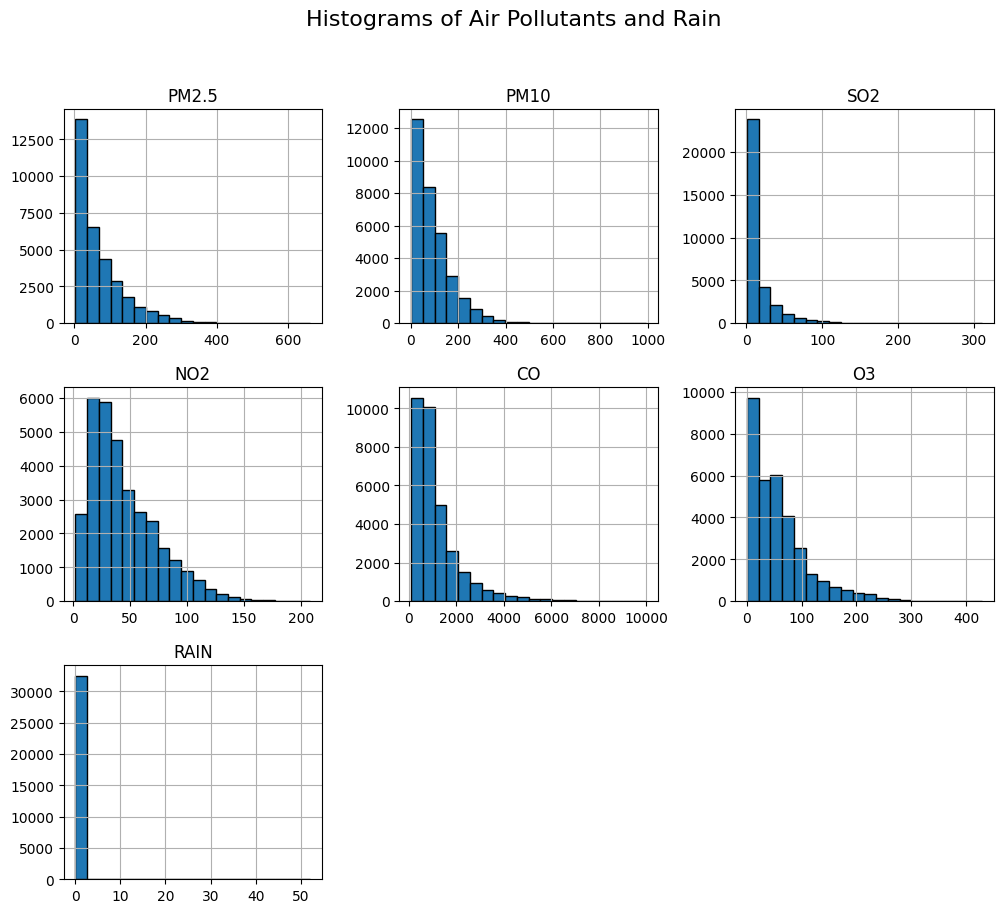

In [10]:
# Distribusi data
# Histogram untuk variabel numerik
data_cleaned[numeric_columns].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Air Pollutants and Rain', fontsize=16)
plt.show()

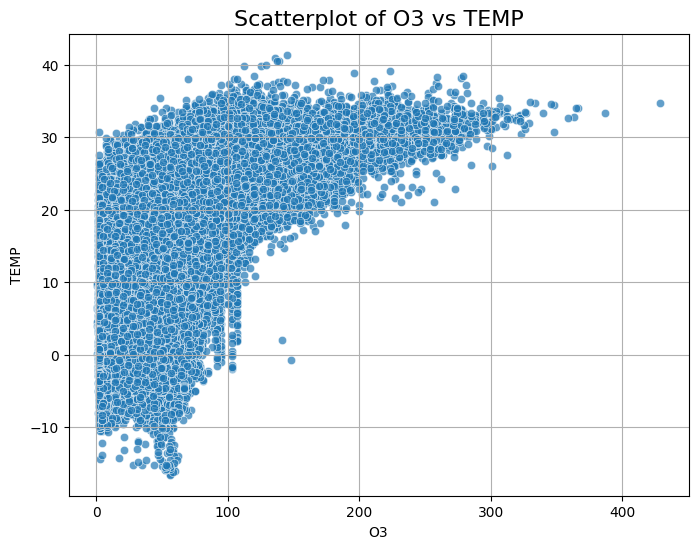

In [11]:
# Dugaan hubungan antara variabel O3 dan TEMP
# Scatterplot O3 vs TEMP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='O3', y='TEMP', data=data_cleaned, alpha=0.7)
plt.title('Scatterplot of O3 vs TEMP', fontsize=16)
plt.xlabel('O3')
plt.ylabel('TEMP')
plt.grid()
plt.show()

**Insight:**
- Terlihat bahwa semua kadar polutan udara memiliki distribusi yang menceng kanan.
- Berdasarkan scatter plot antara gas O3 dan Temperatur terlihat seperti terdapat hubungan yang berbanding lurus.
- Tidak terdapat data terkait curah hujan (kolom RAIN 0 semua)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana korelasi dari setiap polutan udara terhadap temperatur?

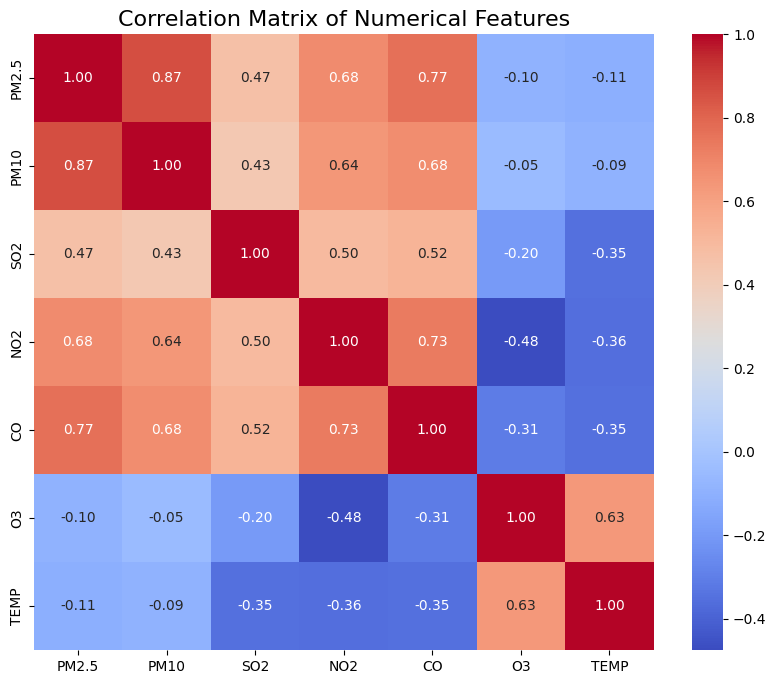

In [17]:
# Analisis Korelasi
newnum_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3','TEMP']
correlation_matrix = data_cleaned[newnum_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Matriks terhadap Setiap Variabel', fontsize=16)
plt.show()

Teknik analisis ini cukup efisien untuk memeriksa korelasi antara banyak variabel secara sekaligus terhadap suatu variabel tertentu.

### Pertanyaan 2: Bagaimana perubahan rata-rata kadar polutan udara yang mempengaruhi temperatur dari tahun 2013-2017?

<ipython-input-20-b8f7691f3f87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['O3'] = pd.to_numeric(data_cleaned['O3'], errors='coerce')


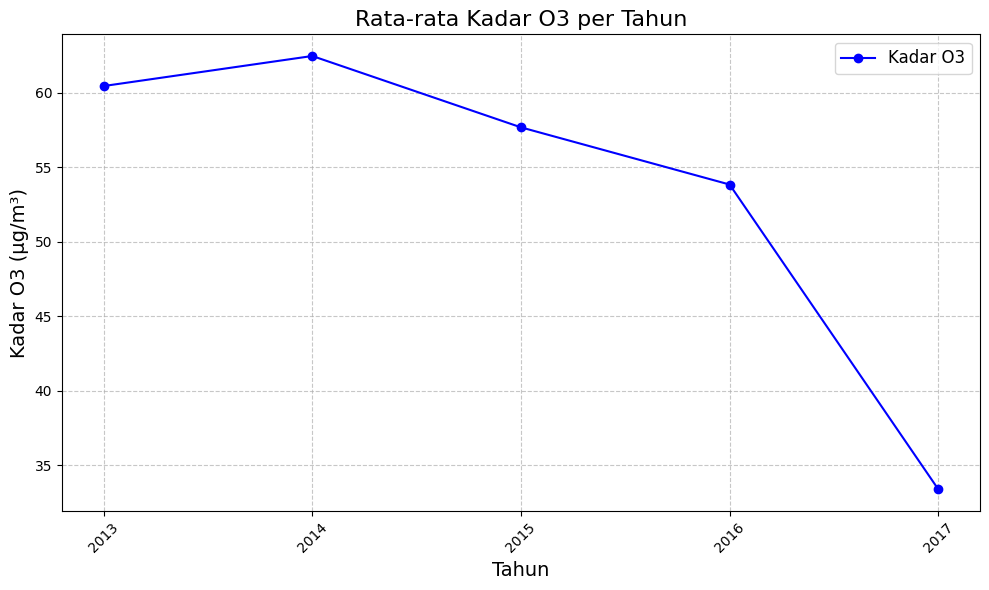

In [20]:
data_cleaned['O3'] = pd.to_numeric(data_cleaned['O3'], errors='coerce')

o3_per_year = data_cleaned.groupby('year')['O3'].mean().reset_index()

# Visualisasi data
plt.figure(figsize=(10, 6))
plt.plot(o3_per_year['year'], o3_per_year['O3'], marker='o', linestyle='-', color='b', label='Kadar O3')
plt.title('Rata-rata Kadar O3 per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Kadar O3 (μg/m³)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(o3_per_year['year'], rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-22-17027c178780>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['TEMP'] = pd.to_numeric(data_cleaned['TEMP'], errors='coerce')


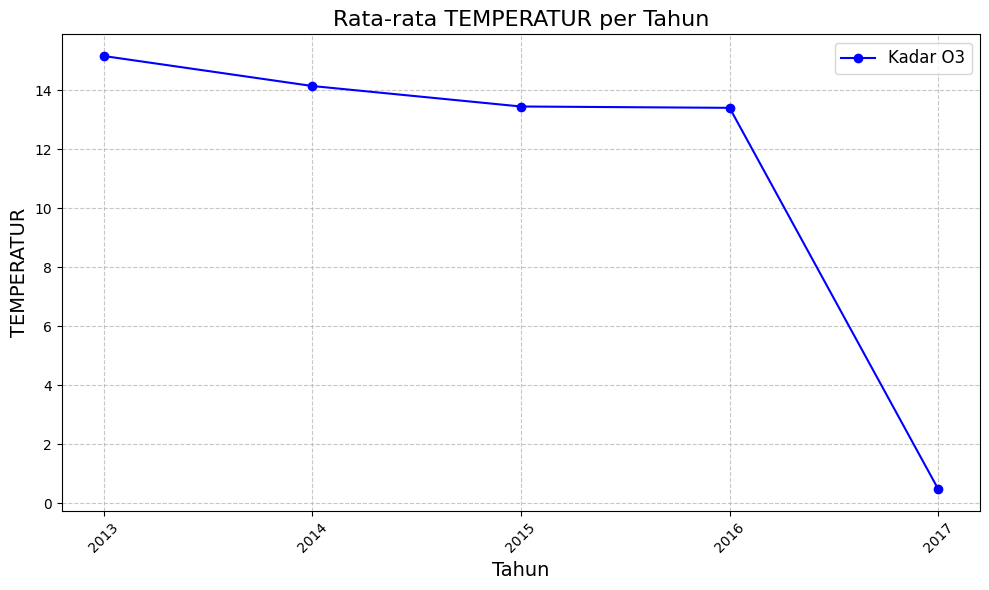

In [22]:
data_cleaned['TEMP'] = pd.to_numeric(data_cleaned['TEMP'], errors='coerce')

o3_per_year = data_cleaned.groupby('year')['TEMP'].mean().reset_index()

# Visualisasi data
plt.figure(figsize=(10, 6))
plt.plot(o3_per_year['year'], o3_per_year['TEMP'], marker='o', linestyle='-', color='b', label='Kadar O3')
plt.title('Rata-rata Temperatur per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Temperatur', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(o3_per_year['year'], rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan peta korelasi numerik dari setiap variabel, diperoleh korelasi terbesar antara kadar polutan O3 dengan temperatur yakni sebesar 0.63. Ini berarti kadar O3 dan temperatur cukup berkorelasi dan berbanding lurus.
- Terlihat jelas bahwa dari tahun 2013-2017, berdasarkan visualisasi dengan menurunnya kadar polutan O3, temperatur rata-rata di Stasiun Changping juga menurun

## Conclusion

- Berdasarkan hasil visualisasi scatter plot dan heatmap korelasi antar varibel, dapat dikatakan gas O3 memiliki korelasi yang berbanding lurus dan paling besar di antara polutan udara lainnya terhadap perubahan temperatur di Stasiun Changping
- Terlihat jelas bahwa dengan menurunnya kadar polutan udara O3 di Stasiun Changping, temperatur pada stasiun tersebut juga menurun.